Constant Q0 = 4.0000, -> Q0^2 = priceRange
Price shift in 1 day = 1.0000 -> 1 means 100% increase


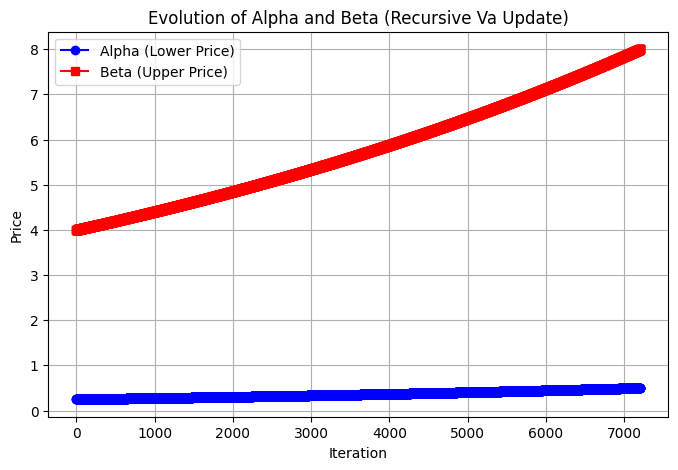

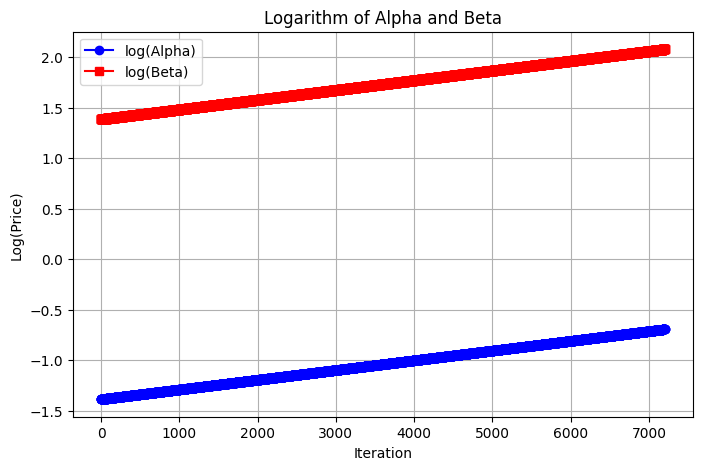

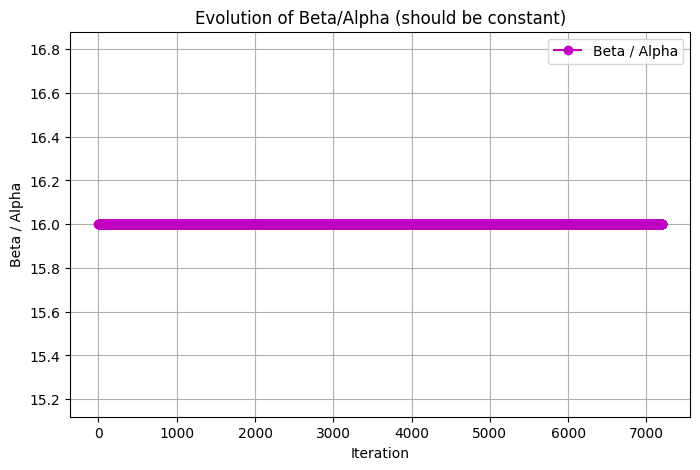

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
IncreasePerDay = 1 # 1 is 100%
# Exponential scaling factor for Va: each iteration, Va = initial_Va * (1 + c) ** (n+1)
c = -.0000962677 * IncreasePerDay # 1.03877 was empirically found to satisfy the increase per day with 7200 blocks per day

# In this simulation we are shifting the price range towards a higher price of A
# given the market price of A is higher then that offered by the pool, which is why 
# the pool is in "out-of-range" state without token A (Ra = 0)
# If the pool was "out-of-range" without token B we would do the same calculations BUT 
# swapping A for B 

priceRange = 16
Ra = 0.0        # Constant Ra
Rb = 3.0        # Constant Rb
# # Initializing pool with virtual balances proportional to real to get desired priceRange
# # Ra AND Rb must be different from zero
# initial_Va = Ra / (priceRange ** (1/4)-1)   # initial Va
# initial_Vb = Rb / (priceRange ** (1/4)-1)   # initial Vb

# Assuming arbritary Va and Vb
initial_Va = 1
initial_Vb = 1

# Compute constant Q0 from the initial conditions:
# Q0 = ((Va0 + Ra) * (Vb0 + Rb)) / (Va0 * Vb0)
Q0 = ((initial_Va + Ra) * (initial_Vb + Rb)) / (initial_Va * initial_Vb)
print(f"Constant Q0 = {Q0:.4f}, -> Q0^2 = priceRange")

# Number of iterations (time steps)
steps = 7200
time_vals = list(range(steps + 1))

# Initialize storage lists
Va_vals = []
Vb_vals = []
RmaxA_vals = []
RmaxB_vals = []
alpha_vals = []
beta_vals = []
ratio_vals = []       # to store beta/alpha at each iteration
invariant_vals = []   # to store invariant k = (Va+Ra)(Vb+Rb)

# Initialize Va and Vb for recursion
Va = initial_Va
Vb = initial_Vb

for n in time_vals:
    # Store current Va and Vb
    Va_vals.append(Va)
    Vb_vals.append(Vb)
    
    # Step 3: Compute the invariant for this iteration:
    k = (Va + Ra) * (Vb + Rb)
    invariant_vals.append(k)
    
    # Step 4: Compute RmaxA and RmaxB from the invariant:
    # (Va + RmaxA)*Vb = k   =>   RmaxA = k/Vb - Va
    # Va*(Vb + RmaxB) = k   =>   RmaxB = k/Va - Vb
    RmaxA = k / Vb - Va
    RmaxB = k / Va - Vb
    RmaxA_vals.append(RmaxA)
    RmaxB_vals.append(RmaxB)
    
    # Step 5: Compute extreme prices:
    # Lower price: alpha = Vb / (Va + RmaxA)
    # Upper price: beta  = (Vb + RmaxB) / Va
    alpha = Vb / (Va + RmaxA)
    beta  = (Vb + RmaxB) / Va
    alpha_vals.append(alpha)
    beta_vals.append(beta)
    
    # Compute the ratio beta/alpha (should be constant = Q0^2)
    ratio = beta / alpha
    ratio_vals.append(ratio)
    
    # print(f"n={n:2d}: Va={Va:.4f}, Vb={Vb:.4f}, k={k:.4f}, alpha={alpha:.4f}, beta={beta:.4f}, beta/alpha={ratio:.4f}")
    
    # Step 1 (recursive update for Va) and Step 2 (update Vb to maintain invariant):
    # Exponential update for Va:
    Va = initial_Va * (1 + c) ** (n+1)
    # Update Vb so that (Va+Ra)(Vb+Rb)/(Va*Vb) = Q0 remains:
    Vb = (Rb * (Va + Ra)) / (((Q0 - 1) * Va) - Ra)
    # However we assume for calculation simplicity that Ra is 0 and Rb is RmaxB
    # Vb = (RmaxB * (Va + 0)) / (((Q0 - 1) * Va) - 0)

print(f"Price shift in 1 day = {(beta_vals[-1]/beta_vals[0])-1:.4f} -> 1 means 100% increase")

# Plot 1: Raw values of Alpha and Beta over time.
plt.figure(figsize=(8, 5))
plt.plot(time_vals, alpha_vals, 'b-o', label='Alpha (Lower Price)')
plt.plot(time_vals, beta_vals, 'r-s', label='Beta (Upper Price)')
plt.xlabel("Iteration")
plt.ylabel("Price")
plt.title("Evolution of Alpha and Beta (Recursive Va Update)")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Natural logarithm of Alpha and Beta over time.
plt.figure(figsize=(8, 5))
plt.plot(time_vals, np.log(alpha_vals), 'b-o', label='log(Alpha)')
plt.plot(time_vals, np.log(beta_vals), 'r-s', label='log(Beta)')
plt.xlabel("Iteration")
plt.ylabel("Log(Price)")
plt.title("Logarithm of Alpha and Beta")
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Ratio beta/alpha over time (should remain constant = Q0^2).
plt.figure(figsize=(8, 5))
plt.plot(time_vals, ratio_vals, 'm-o', label='Beta / Alpha')
plt.xlabel("Iteration")
plt.ylabel("Beta / Alpha")
plt.title("Evolution of Beta/Alpha (should be constant)")
plt.legend()
plt.grid(True)
plt.show()

# # Plot 4: Invariant k over time.
# plt.figure(figsize=(8, 5))
# plt.plot(time_vals, invariant_vals, 'g-o', label='Invariant k = (Va+Ra)(Vb+Rb)')
# plt.xlabel("Iteration")
# plt.ylabel("Invariant k")
# plt.title("Evolution of the Invariant")
# plt.legend()
# plt.grid(True)
# plt.show()